In [2]:
import pandas as pd

In [3]:
file_path = r"C:\Users\Pannawit\Documents\GitHub\Deep-learning\Basic_AI_FirstLearning\Test1\Book1.xlsx"
data = pd.read_excel(file_path)

print(data)

       x        y
0      1    10.96
1      2    20.77
2      3    30.58
3      4    40.39
4      5    50.20
..   ...      ...
305  306  3003.01
306  307  3012.82
307  308  3022.63
308  309  3032.44
309  310  3042.25

[310 rows x 2 columns]


   x      y
0  1  10.96
1  2  20.77
2  3  30.58
3  4  40.39
4  5  50.20
                x            y
count  310.000000   310.000000
mean   155.500000  1526.605000
std     89.633513   879.304763
min      1.000000    10.960000
25%     78.250000   768.782500
50%    155.500000  1526.605000
75%    232.750000  2284.427500
max    310.000000  3042.250000
x    0
y    0
dtype: int64
     x    y
x  1.0  1.0
y  1.0  1.0


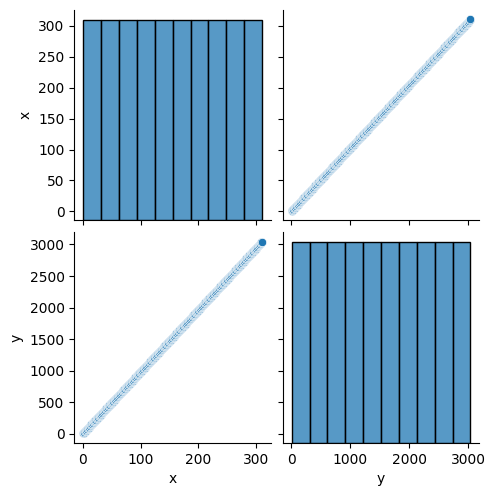

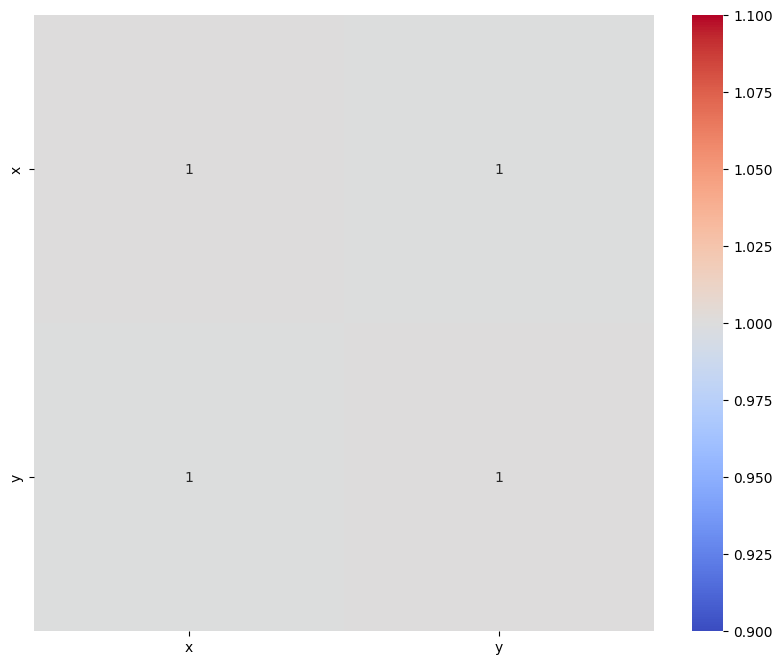

In [4]:
# Prepare data before Training DL
# Display first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Basic correlation matrix
print(data.corr())

# Visualize relationships (example using seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Heatmap to visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
import numpy as np

In [6]:
# Prepare the data
X = data['x'].values
y = data['y'].values

# Calculate the means of X and y
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of W
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

# Calculate W and b
W = numerator / denominator
b = y_mean - (W * X_mean)

print(f"Weight (W): {W}")
print(f"Intercept (b): {b}")

Weight (W): 9.81
Intercept (b): 1.150000000000091


In [7]:
if W.ndim == 1:
    W = W.reshape(-1, 1)

In [8]:
def propagation(X):
    X = np.array(X).reshape(-1, 1)
    Y_hat = X * W + b
    return Y_hat

# Make a prediction for X = 5
prediction = propagation([5])
print(f"Prediction is: {prediction[0][0]}")
print(f"Actual data is: {data['y'][4]}")

Prediction is: 50.200000000000095
Actual data is: 50.2


In [33]:
def cost_function(X, y):
    m = len(y)
    Y_hat = propagation(X)
    cost = (1 / (2*m)) * np.sum((y - Y_hat.flatten()) ** 2)
    return cost

In [34]:
cost = cost_function(X, y)
print(f"Cost function (MSE) is: {cost}")

Cost function (MSE) is: 1550602.7869250001


<h1>Try Gradient Descent</h1>

In [40]:
# Initial Data
W = 0.0
b = 0.0
learning_rate = 0.00001

In [41]:
for i in range(5000000):
    W_ = W
    b_ = b
    # Calculate predictions
    Y_hat = W * X + b
    
    # Calculate the gradients
    dW = -(1 / len(X)) * np.sum(X * (y - Y_hat))
    db = -(1 / len(X)) * np.sum(y - Y_hat)
    
    # Update the parameters
    W = W - learning_rate * dW
    b = b - learning_rate * db

print(f"Final parameters: W {W}, b {b}")

Final parameters: W 9.810000021091525, b 1.1499956340879194


<h1>Try while Loop with Gradient Descent</h1>

In [49]:
# Initial Data
W = 0.0
b = 0.0
learning_rate = 0.00001

In [50]:
while True:
    W_ = W
    b_ = b
    # Calculate predictions
    Y_hat = W * X + b
    
    # Calculate the gradients
    dW = -(1 / len(X)) * np.sum(X * (y - Y_hat))
    db = -(1 / len(X)) * np.sum(y - Y_hat)
    
    # Update the parameters
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if np.abs(Y_hat[len(X) // 2] - y[len(X) // 2]) <= 0.000001:
        break

print(f"Final parameters: W {W}, b {b}")

Final parameters: W 9.81000001960838, b 1.1499959410971914


<h1>Can it fit with almost 100%?</h1>

In [60]:
# Initial Data
W = 0.0
b = 0.0
learning_rate = 0.00001

In [61]:
while True:
    W_ = W
    b_ = b
    # Calculate predictions
    Y_hat = W * X + b
    
    # Calculate the gradients
    dW = -(1 / len(X)) * np.sum(X * (y - Y_hat))
    db = -(1 / len(X)) * np.sum(y - Y_hat)
    
    # Update the parameters
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if np.abs(Y_hat[len(X) // 2] - y[len(X) // 2]) == 0.00000000001:
        break

print(f"Final parameters: W {W}, b {b}")

KeyboardInterrupt: 

In [62]:
# I iterrupted because it was take too long time TwT

print(f"Final parameters: W {W}, b {b}")

Final parameters: W 9.810000000000226, b 1.149999999953934


: 